# **Data Scientist Case Study**

## **Introduction**

An e-commerce site sells through various channels. The aim of this platform is to analyze user events from different channels. On this e-commerce site, all events are available from the moment the user first enters the site to the moment they log out.

Using the data sources collected from BigQuery, it is aimed at determining how we can move forward to increase the engagement of the platform.

The aim is to explore how we can keep users on this platform and, at the same time, increase the sales of the e-commerce site. Also, various data analysis, machine learning, and visualization libraries will be used to analyze the data. Diverse ideas and models will then be generated to increase user engagement.

**Data Columns:**

* **`user_pseudo_id`** = The pseudonymous id (e.g., app instance ID) for the user.
*   **`event_timestamp`** = The time (in microseconds, UTC) when the event was logged on the client.
*  **`country`** = The country from which events were reported, based on IP address.
* **`region`** = The region from which events were reported, based on IP address.
* **`device_category`** = The device category (mobile, tablet, desktop).
* **`device_operating_system`** = The operating system of the device.
* **`event_name`** = The name of the event.
  * **page_view**: Bir kullanıcının bir web sayfasını görüntülemesi.
  * **user_engagement**: Bir kullanıcının bir web sitesi veya uygulama ile etkileşimde bulunma derecesi.
  * **scroll**: Bir kullanıcının bir web sayfasında aşağı veya yukarı kaydırması.
  * **view_item**: Bir kullanıcının bir ürün sayfasını görüntülemesi.
  * **session_start**: Bir kullanıcının bir web sitesi veya uygulama ile yeni bir oturum başlatması.
  * **first_visit**: Bir kullanıcının bir web sitesini veya uygulamayı ilk kez ziyaret etmesi.
  * **view_promotion**: Bir kullanıcının bir promosyonu görüntülemesi.
  * **begin_checkout**: Bir kullanıcının ödeme sürecini başlatması.
  * **add_to_cart**: Bir kullanıcının bir ürünü sepete eklemesi.
  * **select_item**: Bir kullanıcının bir öğeyi seçmesi.
  * **view_search_results**: Bir kullanıcının arama sonuçlarını görüntülemesi.
  * **add_shipping_info**: Bir kullanıcının gönderim bilgilerini eklemesi.
  * **select_promotion**: Bir kullanıcının bir promosyon seçmesi.
  * **add_payment_info**: Bir kullanıcının ödeme bilgilerini eklemesi.
  * **purchase**: Bir kullanıcının bir satın alma işlemi yapması.
  * **click**: Bir kullanıcının bir web sayfasındaki bir öğeye tıklaması.
  

* **`user_first_touch_timestamp`** = The time (in microseconds) at which the user first opened the app or visited the site.
* **`event_params_key`** = The name of the event parameter.
* **`user_ltv_revenue`** = The Lifetime Value (revenue) of the user. This field is not populated in intraday tables.
* **`user_ltv_currency`** = The Lifetime Value (currency) of the user. This field is not populated in intraday tables.
* **`traffic_source_medium`** = Name of the medium (paid search, organic search, email, etc.) that first acquired the user. This field is not populated in intraday tables.
* **`traffic_source_website`** = Name of the network that first acquired the user. This field is not populated in intraday tables.
* **`stream_id`** = The numeric ID of the data stream from which the event originated.
* **`platform`** = The data stream platform (Web, IOS or Android) from which the event originated.






## **Import Libraries And Dataset**

In [8]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'Your Cloud Project Name' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=project:US:bquxjob_2b95d3c6_18d09c432ad)
back to BigQuery to edit the query within the BigQuery user interface.

In [9]:
# Running this code will display the query used to generate your previous job

cookies_data = client.get_job('Write Your BigQuery SQL Job') # Job ID inserted based on the query results selected to explore
print(cookies_data.query)

SELECT
  user_pseudo_id AS user_pseudo_id,
  event_timestamp AS event_timestamp,
  geo.country AS country,
  geo.region AS region,
  device.category AS device_category,
  device.operating_system AS operating_system,
  event_name AS event_name,
  user_first_touch_timestamp AS user_first_touch_timestamp,
  event_param.key AS event_param_key,
  event_param.value.string_value AS string_value,
  event_param.value.int_value AS int_value,
  event_param.value.float_value AS float_value,
  user_ltv.revenue AS user_ltv_revenue,
  user_ltv.currency AS user_ltv_currency,
  traffic_source.medium AS traffic_source_medium,
  traffic_source.source AS traffic_source_website, 
  stream_id AS stream_id, 
  platform AS platform
FROM
  `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`,
  UNNEST(event_params) AS event_param;


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [10]:
# Running this code will read results from your previous job

cookies_data = client.get_job('Write Your BigQuery SQL Job') # Job ID inserted based on the query results selected to explore
cookies_data = cookies_data.to_dataframe()
cookies_data

user_pseudo_id   event_timestamp        country      region  \
0          1026454.4271112504  1612069510766593  United States  California   
1          1026454.4271112504  1612069510766593  United States  California   
2          1026454.4271112504  1612069510766593  United States  California   
3          1026454.4271112504  1612069510766593  United States  California   
4          1026454.4271112504  1612069510766593  United States  California   
...                       ...               ...            ...         ...   
253421  9050621716.2079146956  1612074949444471  United States  California   
253422  9050621716.2079146956  1612074949444471  United States  California   
253423  9050621716.2079146956  1612074949444471  United States  California   
253424  9050621716.2079146956  1612074949444471  United States  California   
253425  9050621716.2079146956  1612074949444471  United States  California   

       device_category operating_system      event_name  \
0               mobile              Web       page_view   
1               mobile              Web       page_view   
2               mobile              Web       page_view   
3               mobile              Web       page_view   
4               mobile              Web       page_view   
...                ...              ...             ...   
253421         desktop              Web  view_promotion   
253422         desktop              Web  view_promotion   
253423         desktop              Web  view_promotion   
253424         desktop              Web  view_promotion   
253425         desktop              Web  view_promotion   

        user_first_touch_timestamp        event_param_key string_value  \
0                 1612069510766593                  gclid         None   
1                 1612069510766593                 gclsrc         None   
2                 1612069510766593             debug_mode         None   
3                 1612069510766593      ga_session_number         None   
4                 1612069510766593               all_data         None   
...                            ...                    ...          ...   
253421            1612074944065877        session_engaged            1   
253422            1612074944065877          ga_session_id         None   
253423            1612074944065877   engagement_time_msec         None   
253424            1612074944065877  engaged_session_event         None   
253425            1612074944065877             debug_mode         None   

         int_value  float_value  user_ltv_revenue user_ltv_currency  \
0             <NA>          NaN               0.0               USD   
1             <NA>          NaN               0.0               USD   
2                1          NaN               0.0               USD   
3                1          NaN               0.0               USD   
4             <NA>          NaN               0.0               USD   
...            ...          ...               ...               ...   
253421        <NA>          NaN               0.0               USD   
253422  5739768113          NaN               0.0               USD   
253423         199          NaN               0.0               USD   
253424           1          NaN               0.0               USD   
253425           1          NaN               0.0               USD   

       traffic_source_medium traffic_source_website   stream_id platform  
0                    organic                 google  2100450278      WEB  
1                    organic                 google  2100450278      WEB  
2                    organic                 google  2100450278      WEB  
3                    organic                 google  2100450278      WEB  
4                    organic                 google  2100450278      WEB  
...                      ...                    ...         ...      ...  
253421               organic                 google  2100450278      WEB  
253422               organi

We are retrieving our data from BigQuery. Afterward, we convert the received data into a DataFrame using the Pandas library.

First, in the initial line, we use a variable called "cookies_data" to fetch data from BigQuery. We do this by using the "`get_job`" function provided by BigQuery. This function is used to obtain the results of a specific operation, which could be a database query or data processing task. We specify the specific operation we want by providing its unique identifier, which in this case is "`bquxjob_5f828f17_18d09cba011`."

Next, in the second line, we assign the results of the operation to the variable "cookies_data." To make this data more manageable and suitable for analysis, we transform it into a DataFrame. A DataFrame is a data structure provided by the Pandas library, which is used for storing and processing tabular data, similar to a spreadsheet.

Finally, in the last line, we display the contents of the "cookies_data" DataFrame. This allows us to view and analyze the results of our operation, making it easier to work with and extract insights from the data. summary, this code retrieves data from BigQuery, converts it into a Pandas DataFrame for analysis, and then displays the DataFrame to facilitate further data exploration and processing.


In [11]:
import pandas as pd
import numpy as np
import datetime as datetime


import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# **Data Cleaning And Processing**

In [42]:
cookies_data.describe().T

count                   mean  \
event_timestamp             253426.0  10726683255364.804688   
user_first_touch_timestamp  244395.0  26214903723265.601562   
int_value                   123713.0      1034029769.501152   
float_value                      0.0                    NaN   
user_ltv_revenue            253426.0               1.564508   
stream_id                   253426.0           2100450278.0   

                                             std                 min  \
event_timestamp               25237446479.599876  1612051200657906.0   
user_first_touch_timestamp  3814405861448.335449  1572273976181201.0   
int_value                      2399654134.382165                 1.0   
float_value                                  NaN                 NaN   
user_ltv_revenue                       13.630192                 0.0   
stream_id                                    0.0        2100450278.0   

                                           25%                 50%  \
event_timestamp             1612073158018664.0  1612094702203333.0   
user_first_touch_timestamp  1612055628508366.0  1612082144565671.0   
int_value                                  1.0                 1.0   
float_value                                NaN                 NaN   
user_ltv_revenue                           0.0                 0.0   
stream_id                         2100450278.0        2100450278.0   

                                           75%                 max  
event_timestamp             1612116588405043.0  1612137595412363.0  
user_first_touch_timestamp  1612110497993393.0  1612137591044846.0  
int_value                               5076.0        9999567833.0  
float_value                                NaN                 NaN  
user_ltv_revenue                           0.0               209.0  
stream_id                         2100450278.0        2100450278.0

In [43]:
cookies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253426 entries, 0 to 253425
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_pseudo_id              253426 non-null  object 
 1   event_timestamp             253426 non-null  Int64  
 2   country                     253426 non-null  object 
 3   region                      253426 non-null  object 
 4   device_category             253426 non-null  object 
 5   operating_system            253426 non-null  object 
 6   event_name                  253426 non-null  object 
 7   user_first_touch_timestamp  244395 non-null  Int64  
 8   event_param_key             253426 non-null  object 
 9   string_value                107939 non-null  object 
 10  int_value                   123713 non-null  Int64  
 11  float_value                 0 non-null       float64
 12  user_ltv_revenue            253426 non-null  float64
 13  user_ltv_curre

In [44]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(cookies_data)

Observations: 253426
Variables: 18
cat_cols: 9
num_cols: 4
cat_but_car: 5
num_but_cat: 2


In [45]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(cookies_data)

                            n_miss   ratio
float_value                 253426  100.00
string_value                145487   57.41
int_value                   129713   51.18
user_first_touch_timestamp    9031    3.56



### **Finding Unique Values**
In this line of code, we are analyzing our dataset by identifying unique values, which will be essential for creating visualizations. Our primary focus is on the `user_pseudo_id` column. In this column, the provided IDs are unique to each user and serve as unique identifiers for the actions they perform within the e-commerce website. As a result, we can use these IDs in conjunction with the categorical variables found in the `event_name` column to analyze and contribute to data visualization.

**This approach allows us to gain insights into the activities performed by users on the website and create meaningful data visualizations based on these unique identifiers and event categories.**

In [46]:
cokkies_data_unique = cookies_data.nunique()
cokkies_data_unique

user_pseudo_id                 2546
event_timestamp               16542
country                          88
region                          286
device_category                   3
operating_system                  6
event_name                       16
user_first_touch_timestamp     2462
event_param_key                  28
string_value                    737
int_value                      9932
float_value                       0
user_ltv_revenue                 13
user_ltv_currency                 1
traffic_source_medium             6
traffic_source_website            5
stream_id                         1
platform                          1
dtype: int64

### **Converting Time Columns**

In this code snippet, we are enhancing the usability of our timestamp columns in the dataset by utilizing the datetime library. We convert these timestamps into the '`HH:MM:SS`' (hour:minute:second) format, allowing us to perform analyses more effectively. These specific columns, `event_timestamp` and `user_first_touch_timestamp`, represent the times when certain events were logged by the client and when a user initially engaged with the application or website. By formatting these timestamps, we aim to calculate the duration of user activity, helping us gain insights into how long users engage with our platform.

In [12]:
cookies_data['event_timestamp'] = pd.to_datetime(cookies_data['event_timestamp'], unit='us')
cookies_data['user_first_touch_timestamp'] = pd.to_datetime(cookies_data['user_first_touch_timestamp'], unit='us')
cookies_data['event_timestamp'] = cookies_data['event_timestamp'].dt.strftime('%H:%M:%S')
cookies_data['user_first_touch_timestamp'] = cookies_data['user_first_touch_timestamp'].dt.strftime('%H:%M:%S')






We are identifying the missing (null or empty) values in the columns of our dataset in this step. This is crucial for future data engineering tasks, as it allows us to make decisions about how to handle these missing values. Depending on the nature of the data and the analysis we plan to perform, we may choose to fill in these missing values in various ways, such as using statistical imputation methods, removing rows with missing data, or applying domain-specific strategies. The decision on how to handle missing values will impact the quality and accuracy of our analyses and models.

In [48]:
cookies_data.isnull().sum()

user_pseudo_id                     0
event_timestamp                    0
country                            0
region                             0
device_category                    0
operating_system                   0
event_name                         0
user_first_touch_timestamp      9031
event_param_key                    0
string_value                  145487
int_value                     129713
float_value                   253426
user_ltv_revenue                   0
user_ltv_currency                  0
traffic_source_medium              0
traffic_source_website             0
stream_id                          0
platform                           0
dtype: int64

## **Data Visualization**

In the context of data analysis and interpretation, "Data Visualization" is a crucial step that involves representing data graphically. It allows us to present information visually through charts, graphs, plots, and other visual elements. Data visualization serves several important purposes:

* **Exploration**: It helps analysts and data scientists explore the dataset to
understand its patterns, trends, and relationships between variables.

* **Communication**: Visualizations make it easier to communicate insights and findings to non-technical stakeholders. A well-designed chart can convey complex information more effectively than tables or raw data.

* **Pattern Recognition**: Visualizations can reveal hidden patterns or anomalies in the data that may not be apparent when examining numbers alone.

* **Decision Making**: They assist in making data-driven decisions by providing a clear and concise representation of information.

* **Storytelling**: Data visualizations can be used to tell a story about the data, making it more engaging and informative.


### **Total User Logins and Transactions by Country**

One of the initial aspects we should explore in our dataset is the volume of users and transactions from different countries. In the following charts, you can see the top 5 countries with the highest and lowest numbers of users and transaction volumes.

These charts indicate that the countries with the highest user logins are the United States, India, and Canada. On the other hand, when looking at the countries with the lowest user logins, we observe Estonia, Latvia, and Guatemala.

While these insights provide valuable information about the countries with significant user engagement, it's important to note that they might not be sufficient for a comprehensive analysis. Further investigation is needed to understand the focus marketplaces and the sources of transaction volumes more deeply.


In [60]:
country_user_counts = cookies_data.groupby('country')['user_pseudo_id'].nunique()

top_countries = country_user_counts.nlargest(10)

bottom_countries = country_user_counts.nsmallest(10)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Countries with Most Users', 'Countries with Least Users'))

fig.add_trace(
    go.Bar(x=top_countries.index, y=top_countries.values, name='Most Users'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=bottom_countries.index, y=bottom_countries.values, name='Least Users'),
    row=1, col=2
)

fig.update_layout(title_text='User Distribution by Country', height=600, width=1200)

fig.show()


In [61]:
top_countries = cookies_data['country'].value_counts().head(10)
bottom_countries = cookies_data['country'].value_counts().tail(10)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Countries with Most User Transactions', 'Countries with Least User Transactions'))

fig.add_trace(
    go.Bar(x=top_countries.index, y=top_countries.values, name='Most User Transactions'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=bottom_countries.index, y=bottom_countries.values, name='Least User Transactions'),
    row=1, col=2
)

fig.update_layout(title_text='User Transactions Distribution by Country', height=600, width=1200)
fig.show()


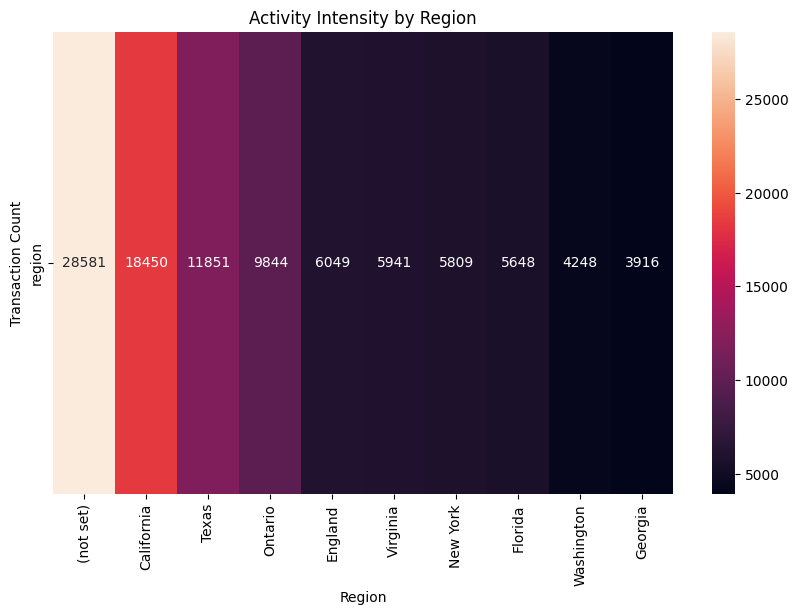

In [51]:
region_counts = cookies_data['region'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(region_counts).T, annot=True, fmt="d")
plt.title('Activity Intensity by Region')
plt.xlabel('Region')
plt.ylabel('Transaction Count')
plt.show()

### **User Rates by Device Category**
When we examine the events of the users, it is seen that 58% of the users conducted the events on desktop, 40% on mobile devices and 2% on tablets.

In [19]:
fig3 = px.pie(data_frame=cookies_data, names='device_category', title='User Rates by Device Category')
fig3.show()


### **Distribution by Operating Systems**

According to the graphic, the web category has the highest number of usages, which amounts to approximately 140 thousand. Among other operating systems, "Android" and "iOS" have moderate usage rates, while "Windows" and "Macintosh" have lower usage rates.

In [22]:
fig4 = px.histogram(data_frame=cookies_data, x='operating_system', title='Distribution by Operating Systems')
fig4.show()


### **Frequency by Activity Names**
Looking at the bar chart, the 'page_view' event appears to have the highest frequency compared to all other events. Events include 'user_engagement', 'scroll', 'view_item', 'session_start', 'first_visit', and other e-commerce related events ('add_to_cart', 'purchase', 'select_item', etc.). The 'click' event on the right-hand side of the graph has the lowest number, indicating that users conduct this action the least. The visual serves as an example of a data visualization that can be used to analyze users' event within a website or app.

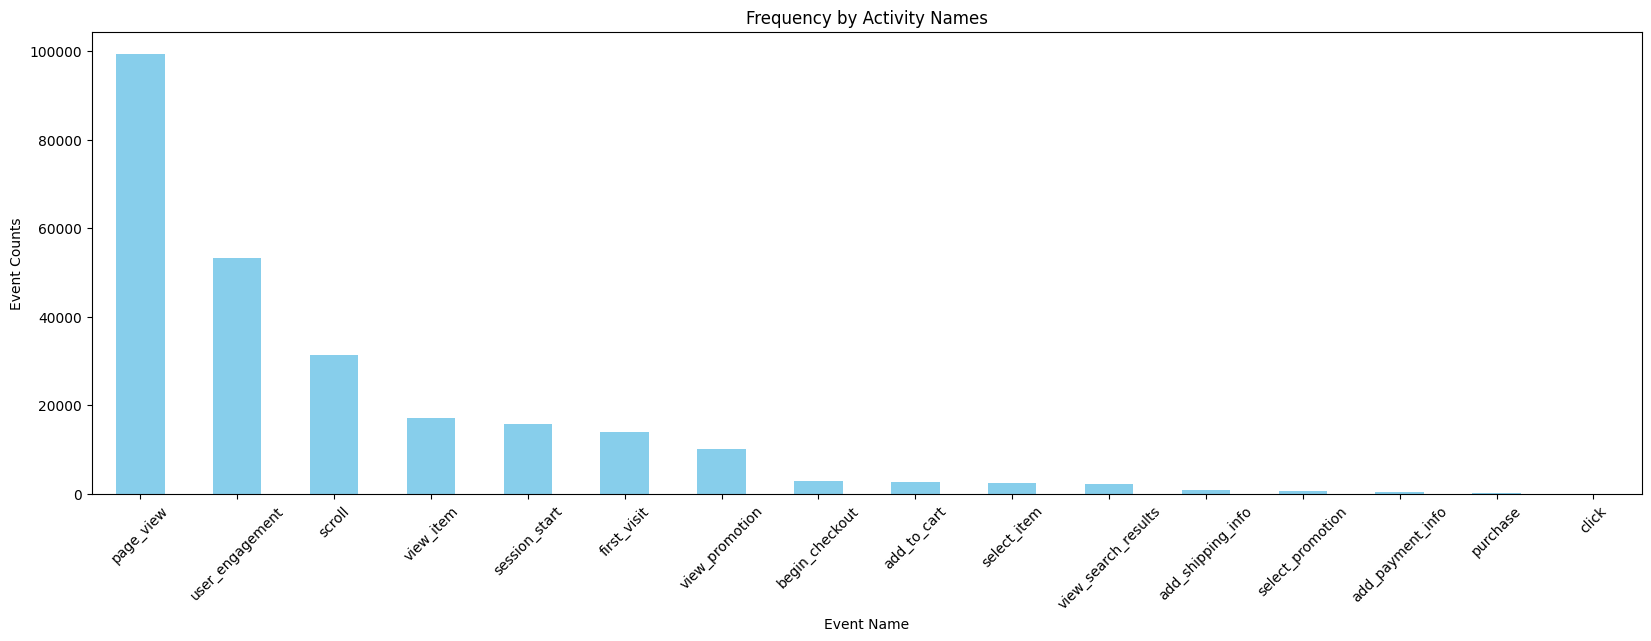

In [26]:
# It seems there was an error with the color name. Let's use a standard color palette.
plt.figure(figsize=(20, 6))
event_counts.plot(kind='bar', color='skyblue')  # Using a standard color 'skyblue'
plt.title('Frequency by Activity Names')
plt.xlabel('Event Name')
plt.ylabel('Event Counts')
plt.xticks(rotation=45)
plt.show()


# **User Distribution by Traffic Sources**


Looking at the graph of user distribution by traffic source, the largest share is "organic," i.e., traffic from organic searches, which accounts for 32.1% of total traffic. Visits with no traffic source (none) come in second, representing 26.9%. "Referral" traffic is in third place with 16.4%. This chart provides useful information for a website owner or marketer, as understanding traffic sources is critical to developing marketing and content strategies.

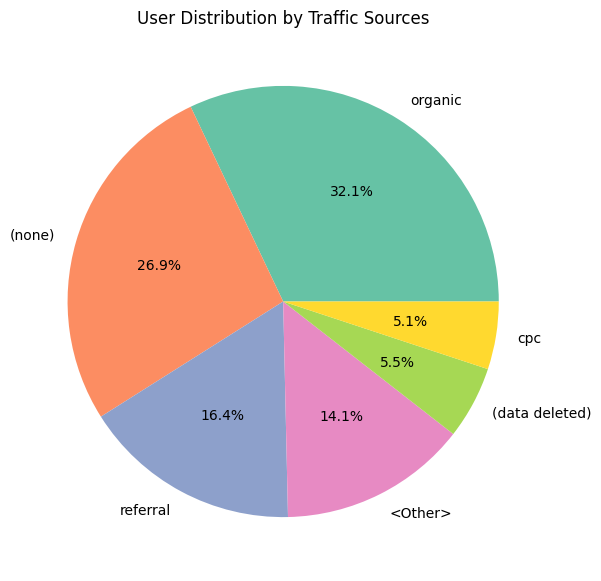

In [29]:
traffic_source_counts = cookies_data['traffic_source_medium'].value_counts()

plt.figure(figsize=(7, 7))
traffic_source_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('User Distribution by Traffic Sources')
plt.ylabel('')
plt.show()

In [13]:
cookies_data['event_timestamp'] = pd.to_datetime(cookies_data['event_timestamp'])
cookies_data['hour'] = cookies_data['event_timestamp'].dt.hour


### **Hourly Activity for Event**
* add_shipping_info : Looking at the user events in the graph, it is seen that the Add Shipping Info event conducts most frequently between 18:00 and 00:00.
* add_payment_info : Looking at the user events in the chart, it is seen that the Add Payment Info event conducts mostly between 18:00 and 00:00.
* add_to_cart : Looking at the user events in the chart, it is seen that the Add to Cart event conducts mostly between 12:00 and 18:00.
* purchase : Looking at the user events in the chart, it is seen that the Purchase event conducts mostly between 6:00 and 12:00.
* select_item : Looking at the user events in the chart, it is seen that the Select Item event conducts mostly between 6:00 and 12:00.
* select_promotion : Looking at the user events in the chart, it is seen that the Select Promotion event conducts mostly between 2:00 and 8:00.
* begin_checkout : Looking at the user events in the chart, it is seen that the Begin Checkout event conducts mostly between 18:00 and 00:00.
* first_visit : Looking at the user events in the chart, it is seen that the First Visit event conducts mostly between 18:00 and 00:00.
* page_view : Looking at the user events in the graph, it is seen that the Page View event conducts mostly between 8:00 and 14:00.
* scroll : Looking at the user events in graphic, it is seen that the Scroll event conducts mostly between 18:00 and 00:00.
* session_start : Looking at the user events in the graph, it is seen that the Session Start event conducts mostly between 9:00 and 15:00.
* user_engagement : Looking at the user events in the graph, it is seen that the User Engagement event conducts mostly between 8:00 and 14:00.
* view_item : Looking at the user events in the chart, it is seen that the View Item event conducts mostly between 00:00 and 6:00.
* view_promotion : Looking at the user events in the chart, it is seen that the View Promotion event conducts mostly between 18:00 and 00:00.
* click : Looking at the user events in the chart, it is seen that the Click event conducts mostly between 18:00 and 00:00.
* view_search_results : Looking at the user events in the graph, it is seen that the View Search Results event conducts mostly between 14:00 and 20:00.

**User Purchase Analysis**

When we analyze the graphs, we can see the stages of the user entering the website and shopping hourly. Users mostly enter the website in the evening hours and add payment and shipping information. Afterwards, they continue with the promotion selection and purchase steps. However, when we examine the purchase graph, we see that there is a decrease in the purchase phase of users.

---

**Promotion Selection Analysis**

When we examine the graphs, users' promotion views are high. However, when we look at the promotion selection, we see that there is a decrease in user transactions. The reason for this is that when the right promotions are not given to users, we might say that users do not shop or use any promotions. In addition, improvements may need to be made in the marketing strategies made here. In this way, we can improve users' use of promotions and purchases.

---

**User Product Purchase**

When we examine the graphs, we understand that users examine the products more, but they do not select the products and add them to the cart. The right marketing strategies may not have been applied here. Therefore, it causes a decrease in the user's purchase of the product. Here, in the same way, in order to increase sales, we can recommend both improving promotions and improving the product detail pages as a user interface.


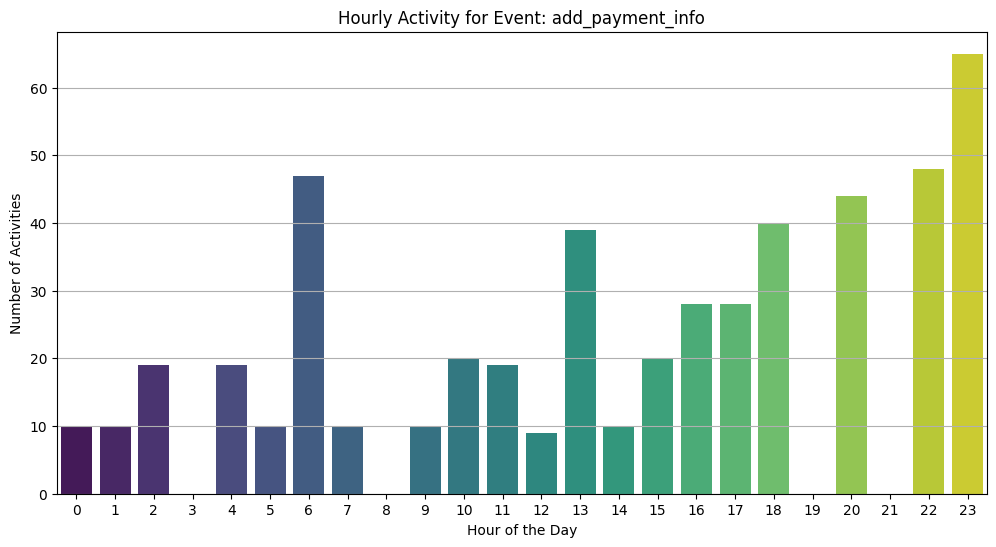

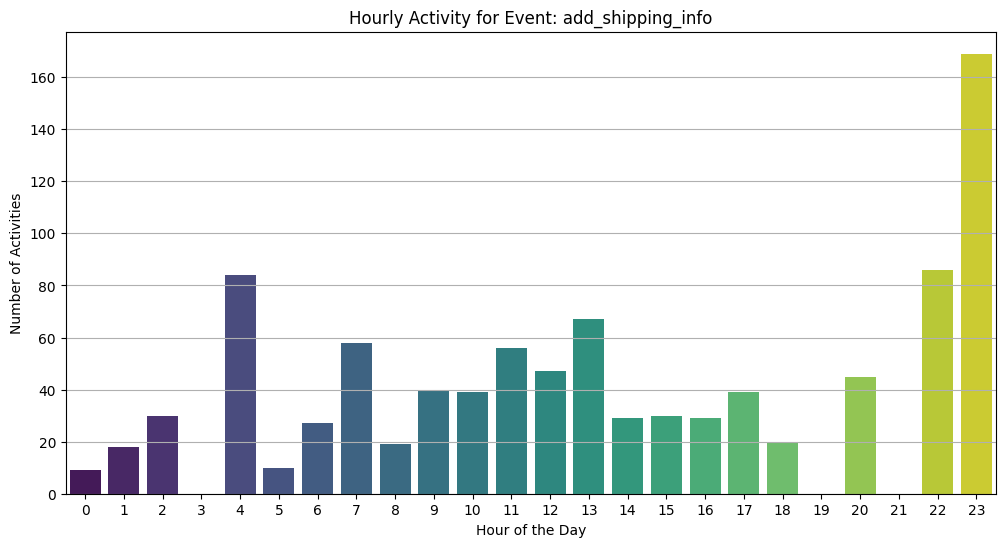

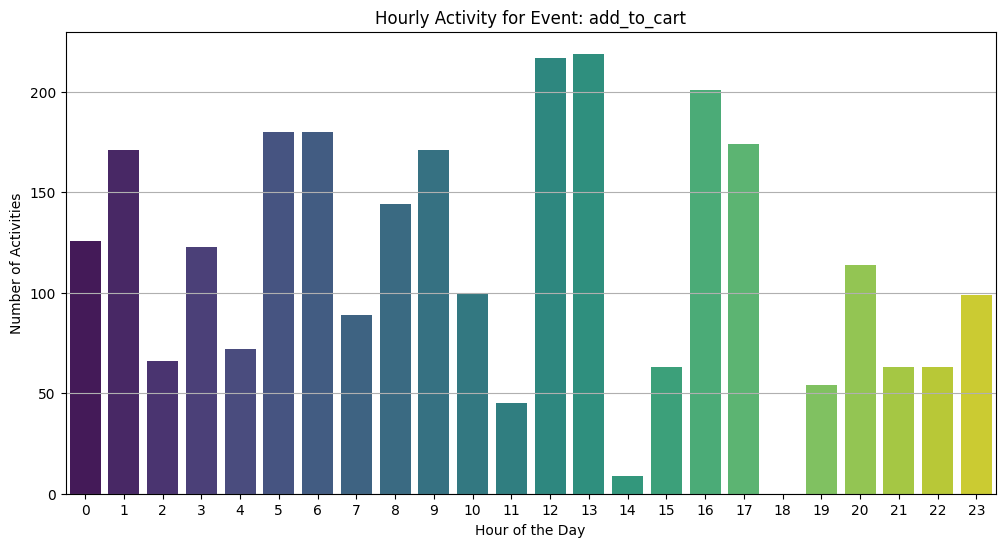

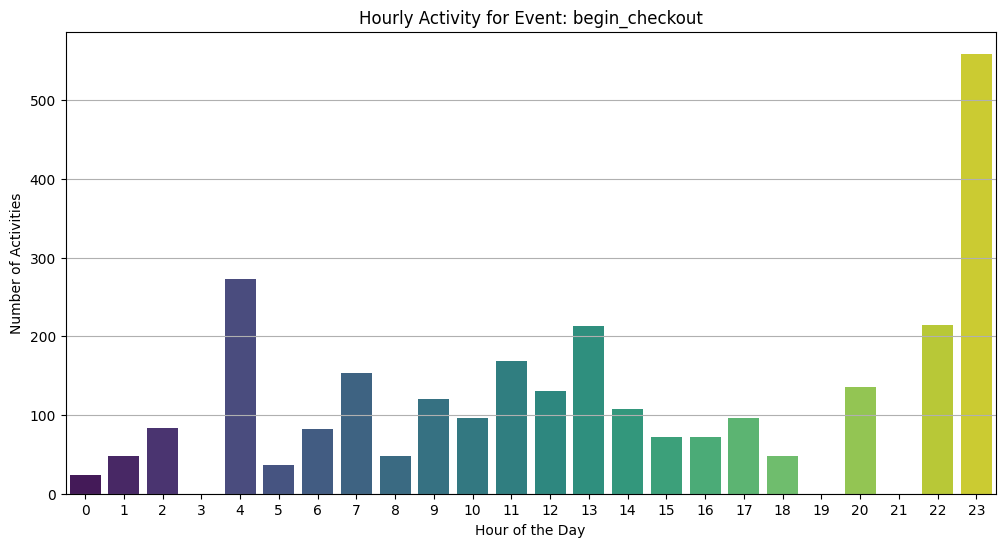

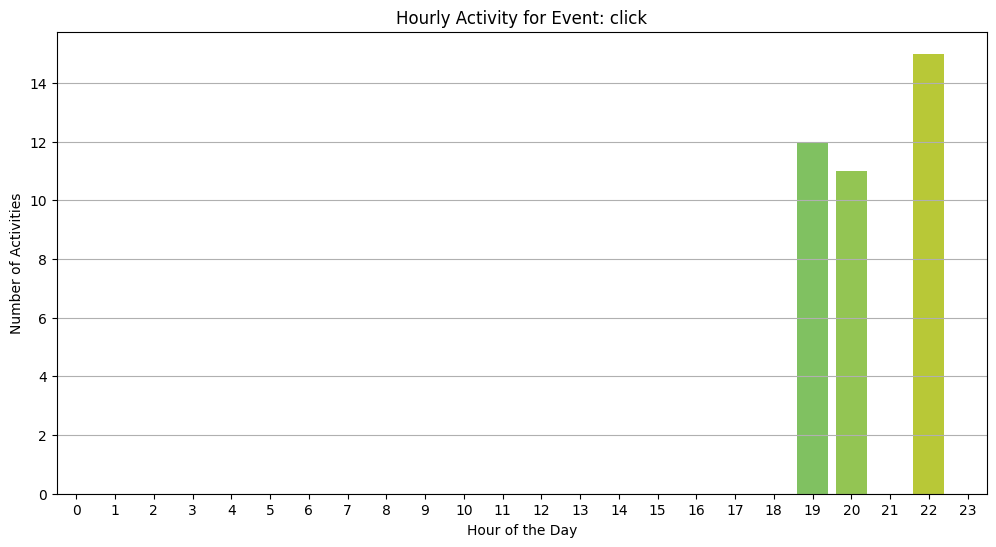

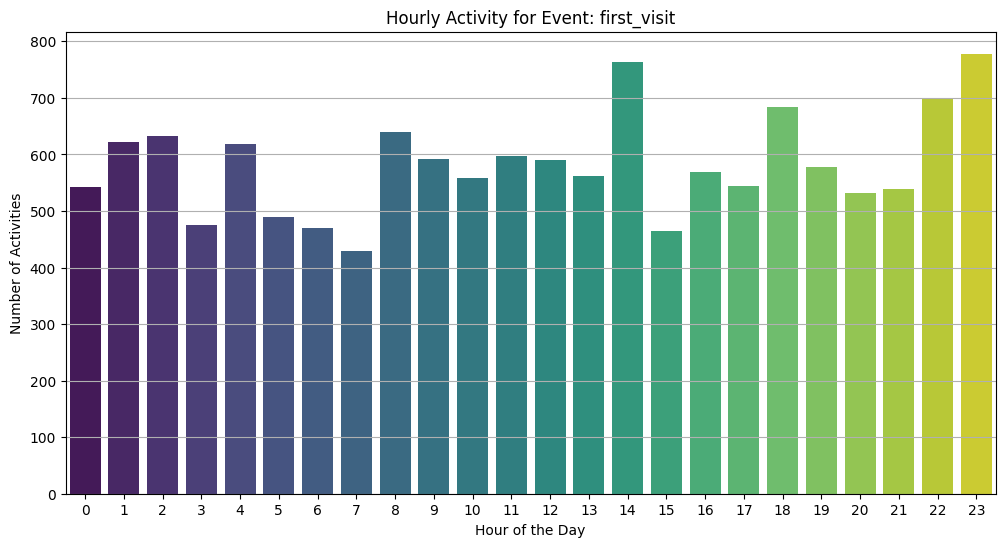

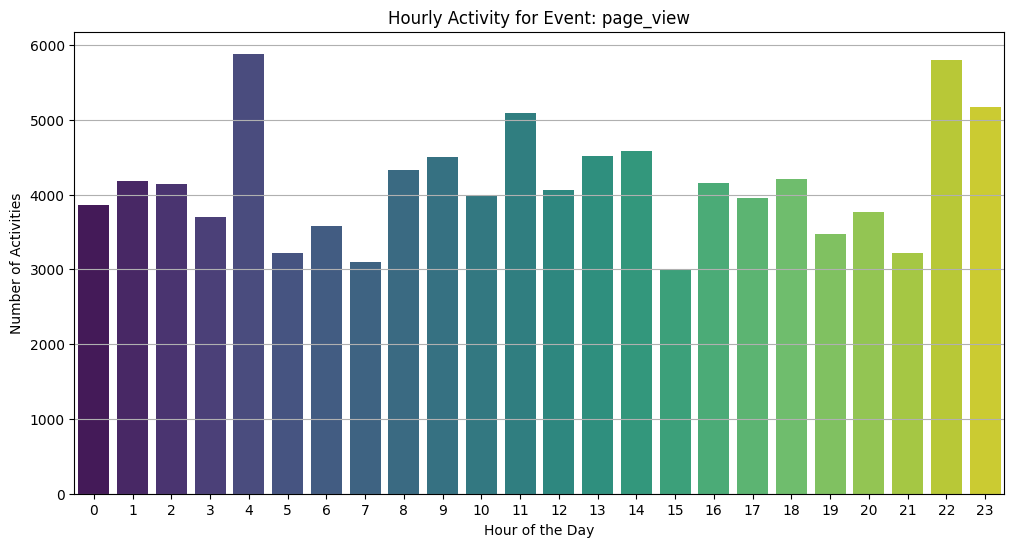

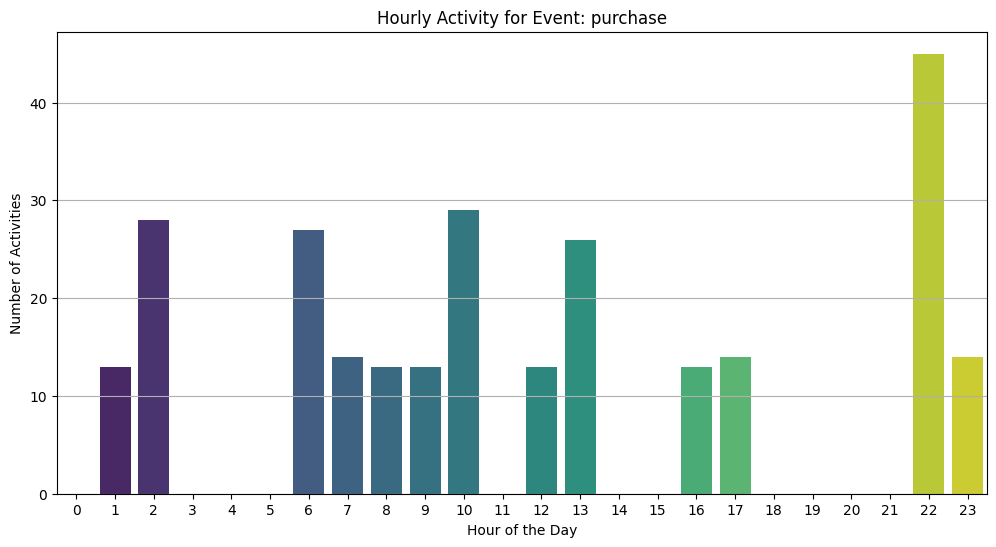

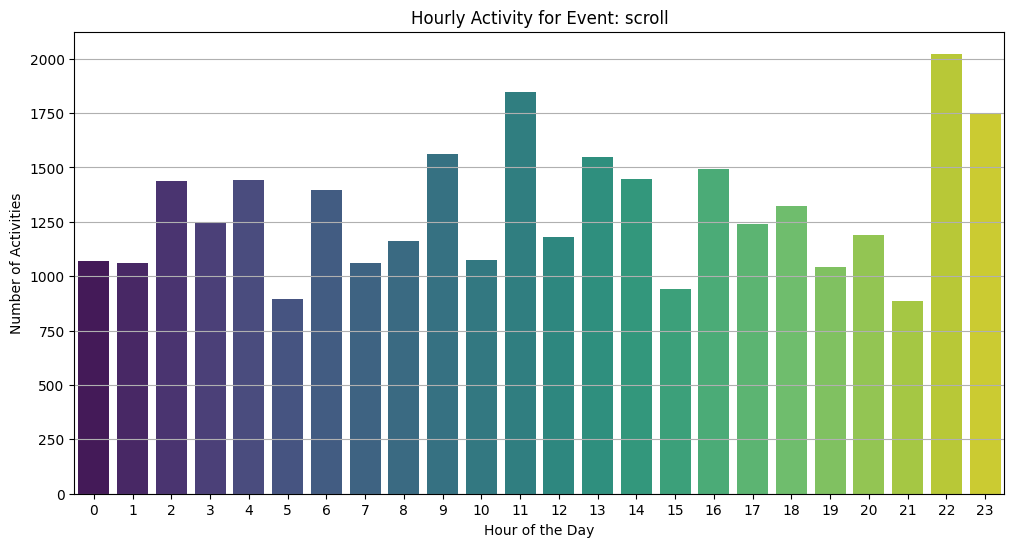

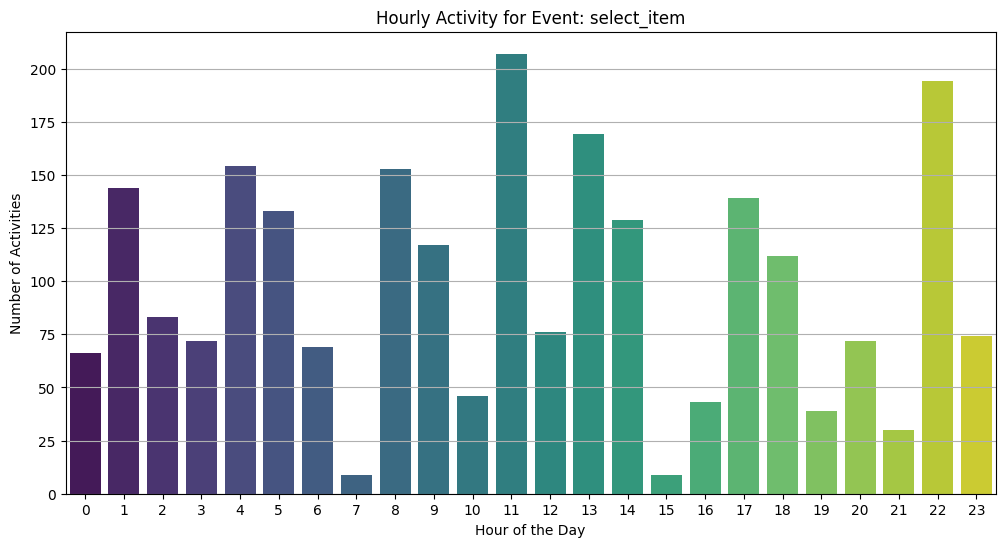

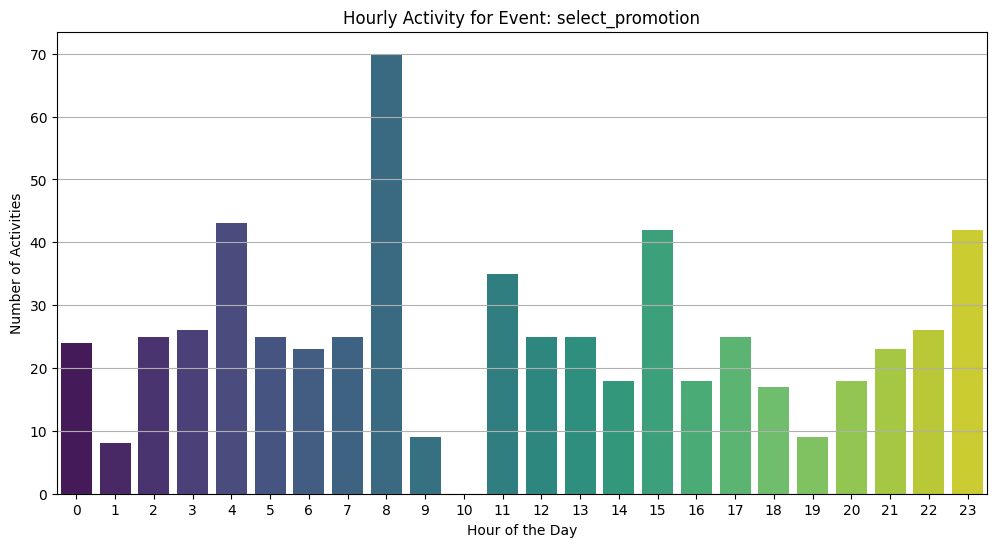

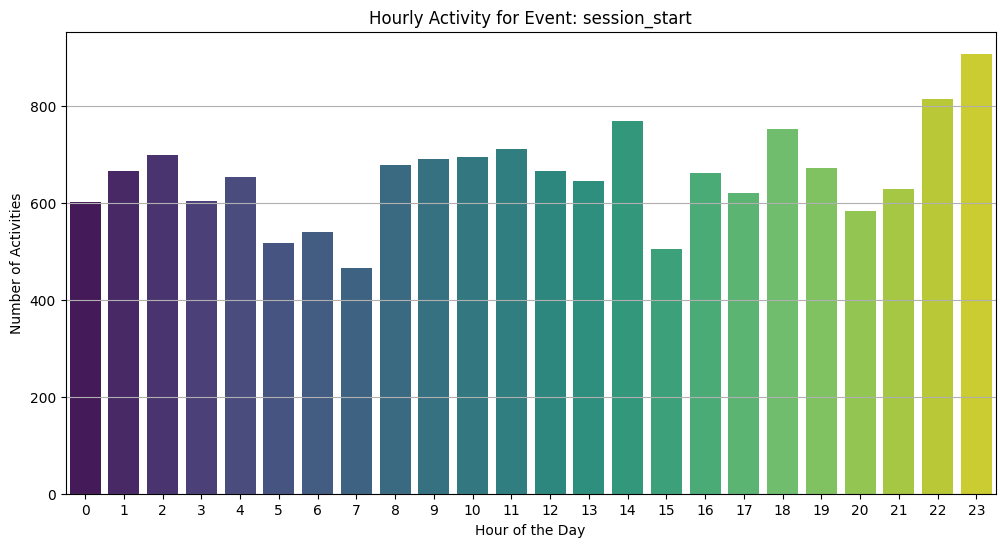

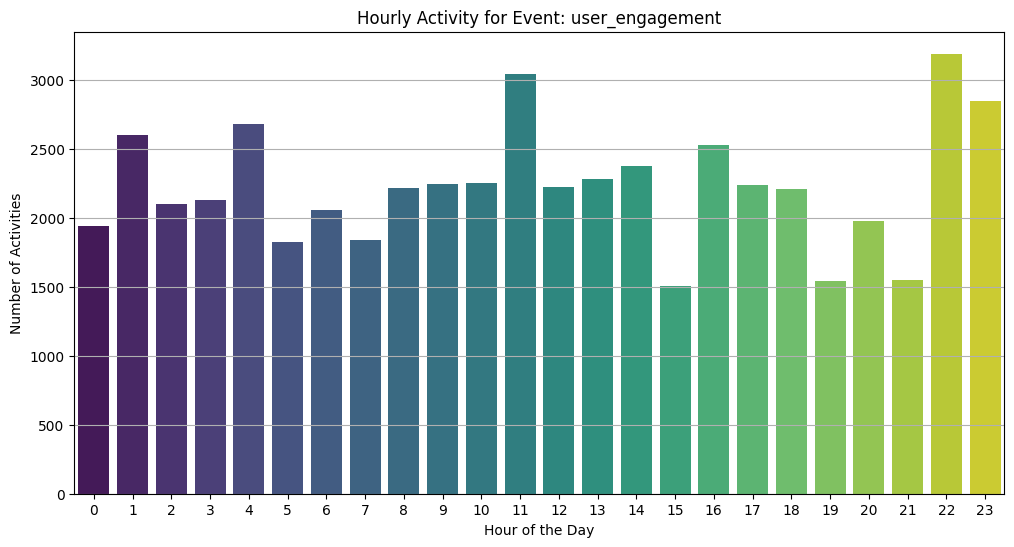

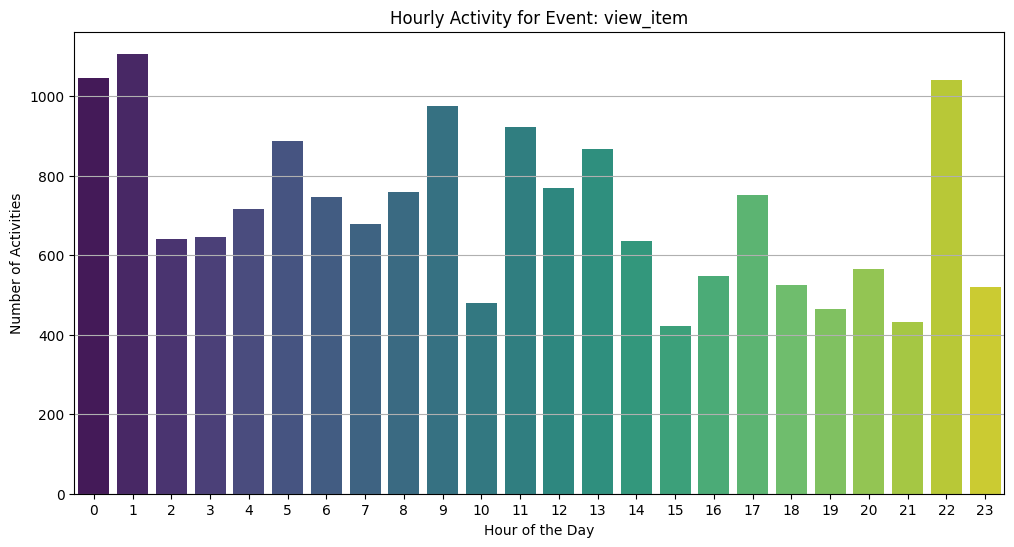

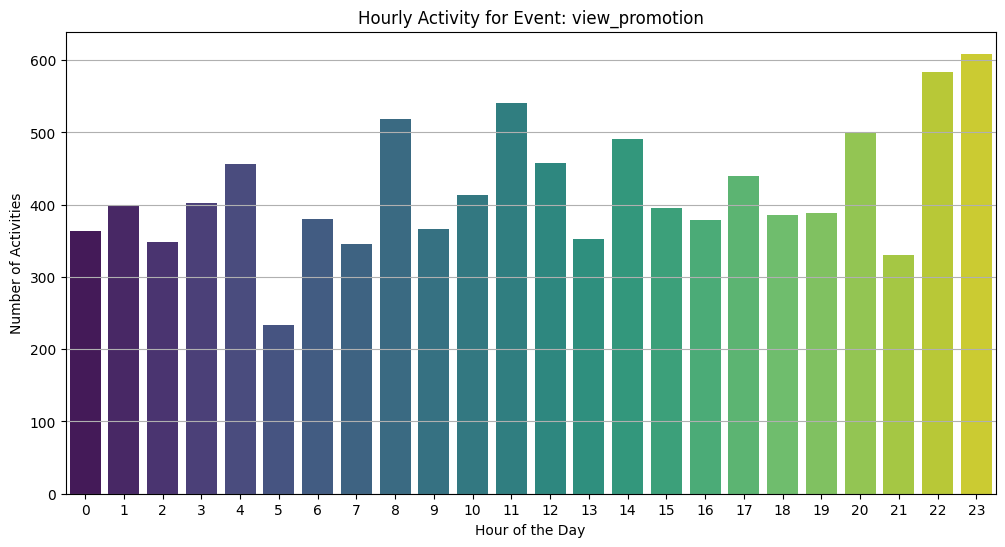

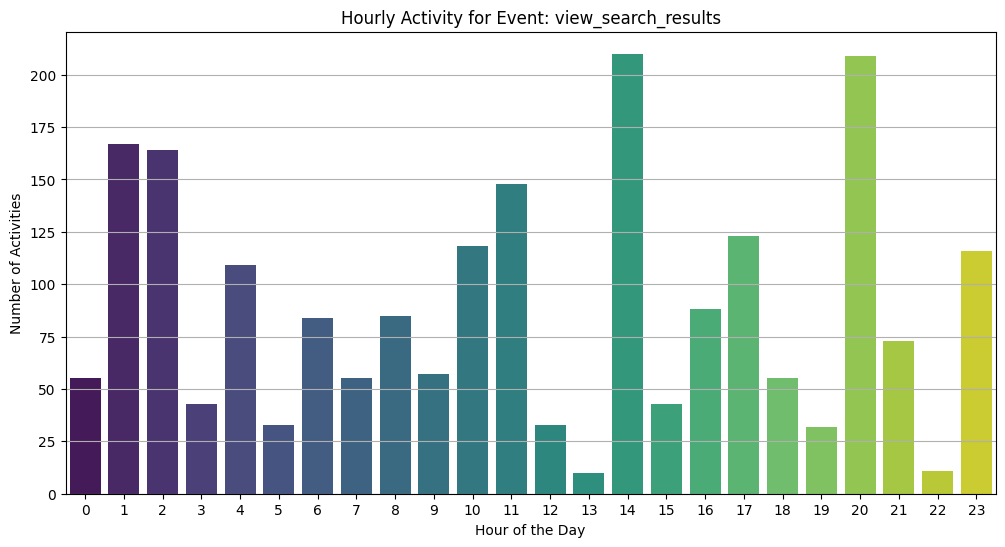

In [14]:
# Group the data by hour and event_name, then count the occurrences
hourly_events = cookies_data.groupby(['hour', 'event_name']).size().unstack(fill_value=0)

# Plotting each event_name in a separate graph
for event in hourly_events.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_events.index, y=hourly_events[event], palette="viridis")
    plt.title(f'Hourly Activity for Event: {event}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Activities')
    plt.xticks(range(0, 24))
    plt.grid(axis='y')
    plt.show()


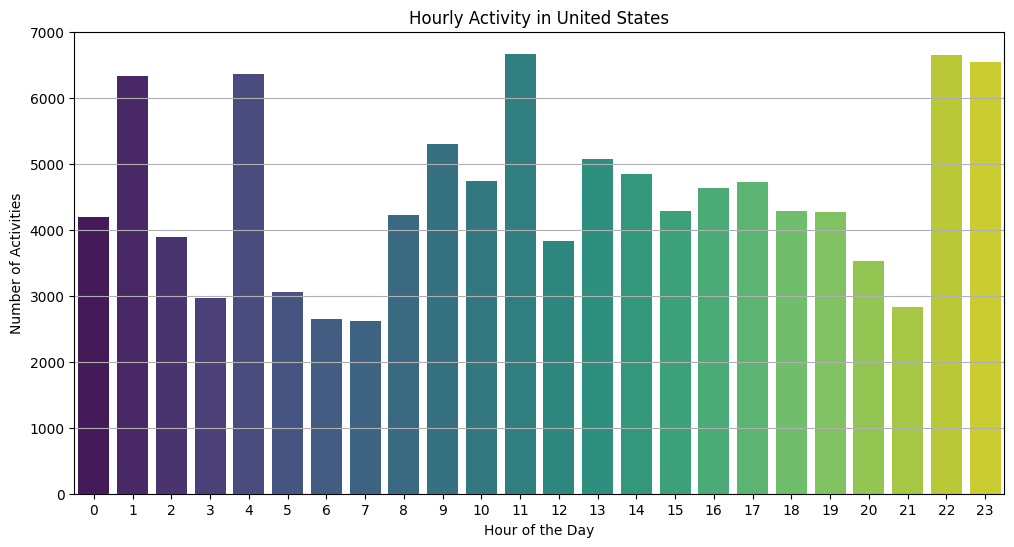

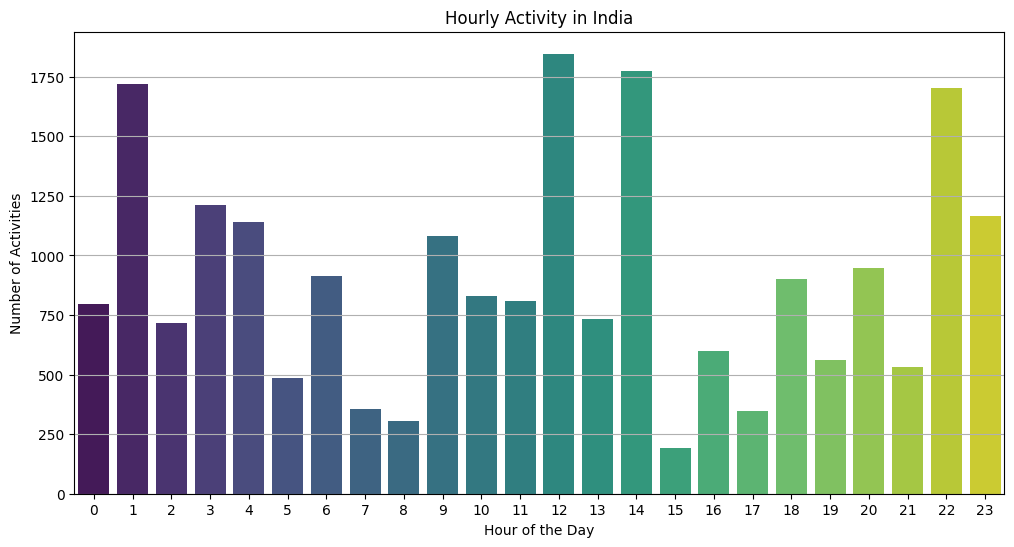

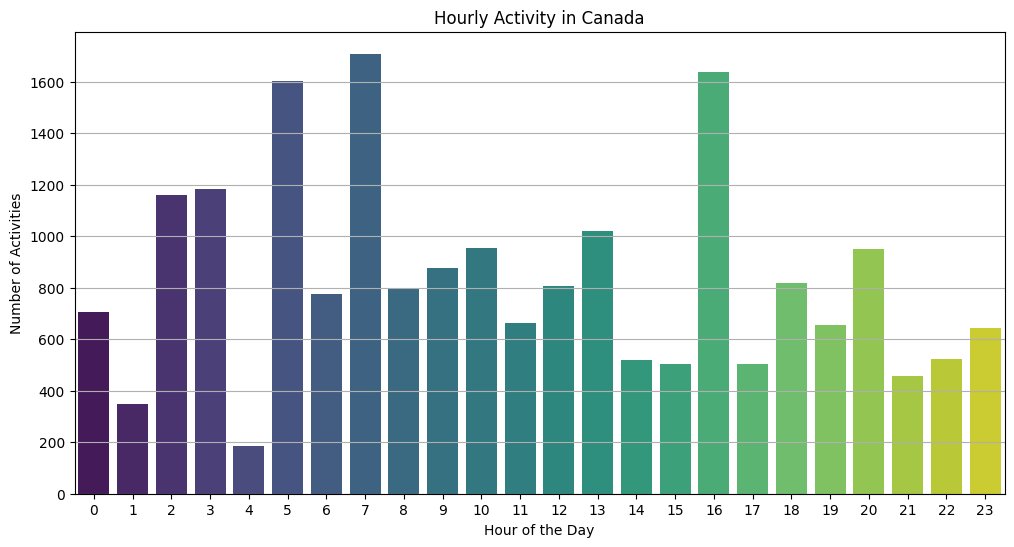

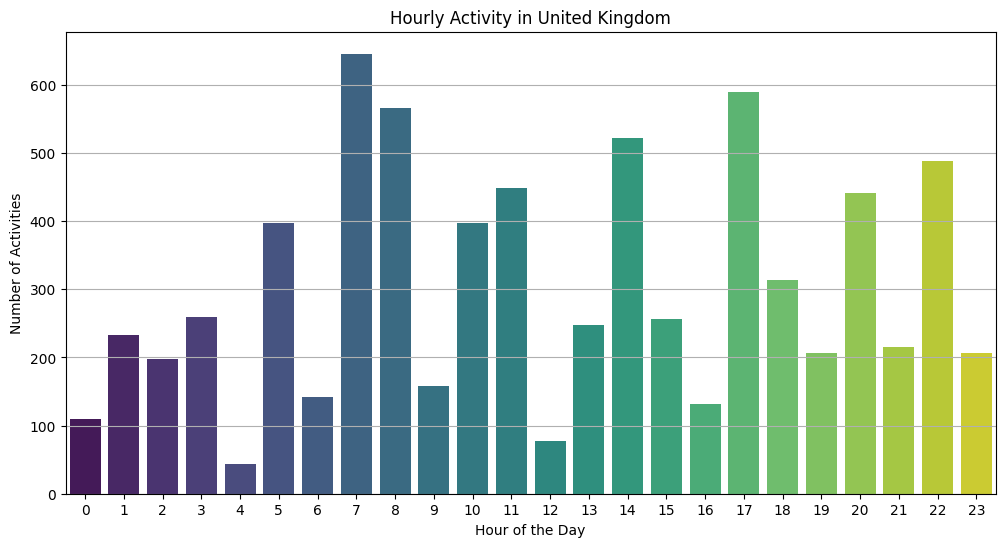

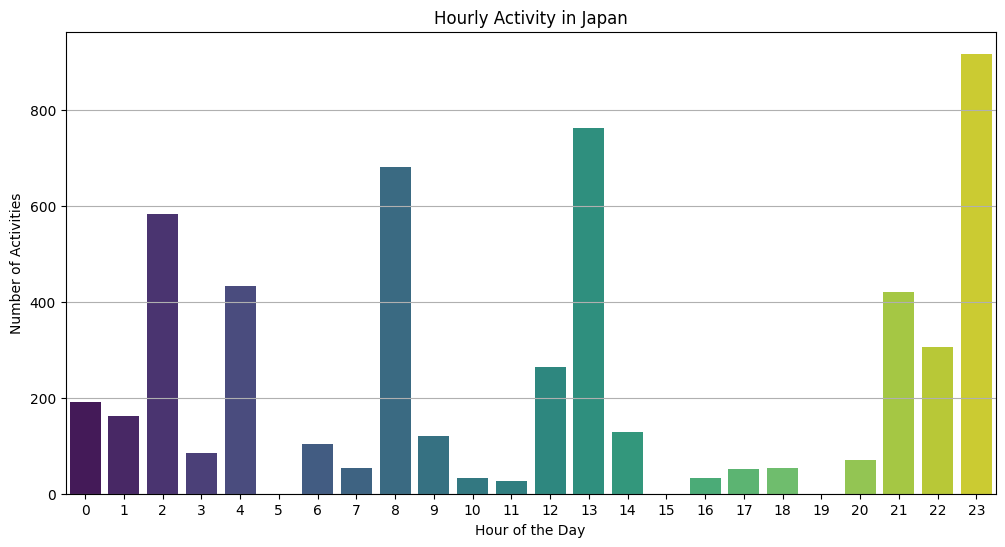

In [18]:
# Saatlik Aktiviteyi Ülkelere Göre Gruplandırma
hourly_country_activity = cookies_data.groupby(['hour', 'country']).size().unstack(fill_value=0)

# İlk beş ülkeyi almak için ülkeleri aktiviteye göre sırala ve ilk beşi seç
top_countries = hourly_country_activity.sum().sort_values(ascending=False).head(5).index

# İlk beş ülke için ayrı ayrı grafikler çiz
for country in top_countries:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_country_activity.index, y=hourly_country_activity[country], palette="viridis")
    plt.title(f'Hourly Activity in {country}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Activities')
    plt.xticks(range(0, 24))
    plt.grid(axis='y')
    plt.show()


# **Insight And Recommendation**

In [82]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

## **Kullanıcı Segmentasyonu**



In [88]:
# Kullanıcı segmentasyonu için veriyi hazırlama
# Categorical verileri numerik hale getirme
data_prep = cookies_data[['country', 'region', 'device_category', 'operating_system']].copy()
data_prep = pd.get_dummies(data_prep, columns=['country', 'region', 'device_category', 'operating_system'])

# Elbow metodunu kullanarak en uygun küme sayısını belirleme
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_prep)
    wcss.append(kmeans.inertia_)

# Elbow grafiğini çizdirme
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines+markers', line=dict(dash='dash'), marker=dict(color='green')))
fig.update_layout(
    title='Elbow Method with Plotly',
    xaxis_title='Number of clusters',
    yaxis_title='WCSS',
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

The dataset for user segmentation analysis has been converted into a numerical format using one-hot encoding, making it ready for the modeling process. Key variables considered in the analysis include country, region, device category, and operating system. The k-means clustering analysis, performed using the Elbow method, has been utilized to determine the optimal number of clusters, with the analysis of WCSS values serving as the basis for this determination.
The graph examining WCSS values reveals a 'elbow' point, indicating the decreasing total internal variance with the increase in the number of clusters, and suggesting the optimal number of clusters. This analysis enables effective segmentation of users based on behavioral characteristics, thereby allowing for more informed execution of marketing strategies and campaigns. The modeling process provides valuable insights for a deep understanding of customer behaviors and for the personalization of marketing efforts.


# **LTV (Ömür Boyu Değer) Tahmini Modeli**

In [ ]:
# Özellik mühendisliği ve ölçeklendirme
features = cookies_data[['country', 'device_category', 'operating_system']]
features = pd.get_dummies(features)
target = cookies_data['user_ltv_revenue']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Yapay sinir ağı modelini oluşturma
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
model.fit(X_train, y_train, epochs=8, batch_size=32)

# Tahminler ve performans değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Modelin RMSE değeri: {rmse}")
print(f"Modelin R2 değeri: {r2}")


## **Trafik Kaynak Analizi Sınıflandırma Modeli**

In [ ]:
# Selecting features and target variable
features = cookies_data[['country', 'region', 'device_category', 'operating_system', 'platform']]
target = cookies_data['traffic_source_medium']

# Handling categorical data
features = pd.get_dummies(features)

# Encoding the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)

accuracy, report




In [89]:
# Recreating the bar plot using Plotly with an enhanced visualization
fig = go.Figure()

# Adding each metric as a separate trace
for metric in metrics_df_extracted.columns:
    fig.add_trace(go.Bar(
        y=metrics_df_extracted.index,
        x=metrics_df_extracted[metric],
        name=metric,
        orientation='h'
    ))

# Setting the layout for the plot
fig.update_layout(
    title='Classification Metrics for Each Class (Enhanced Visualization)',
    xaxis_title='Score',
    yaxis_title='Class',
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    barmode='group'
)

fig.show()



In this study, a machine learning model was used to classify the effects of traffic sources (organic, social media, etc.) on user behavior. With an overall accuracy of 81%, the model was successful in effectively classifying traffic sources. In particular, the 'organic' and '<Other>' categories stood out as classes that the model recognized well with high precision, recall and F1-scores. In contrast, the '(data deleted)' category performed less well, suggesting that the model struggled to correctly identify and classify data belonging to this category.

These results provide valuable insights for more effective planning of marketing strategies and budget allocation. User behaviors from traffic sources where the model performs well provide important data for optimizing marketing activities for these sources. On the other hand, the low-performing classes show that the model needs to be further improved and that more in-depth analysis of the data of these classes is required.

In conclusion, this model contributes to the development of marketing strategies and a better understanding of traffic sources, but further work is needed to improve the precision and coverage of the model. Feature engineering and hyperparameter tuning, with a particular focus on underperforming classes, will improve the overall performance of the model.